# Hello This is Karim ElMolla.

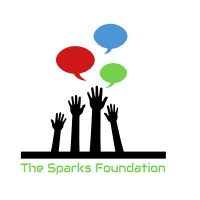

# Task 1 : Predict the percentage that student based on the no. of study hours.

In [11]:
# Firstly I will import all the libaries that I will use it in this task.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from scipy import stats

In [12]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
# Descriptive statistics
study_hours_mean = data['Hours'].mean()
percentage_score_mean = data['Scores'].mean()
print(f"Mean study hours: {study_hours_mean:.2f}")
print(f"Mean percentage score: {percentage_score_mean:.2f}")

Mean study hours: 5.01
Mean percentage score: 51.48


Mean Study Hours: The mean study hours in the dataset is approximately 5.01 hours per day. This represents the average amount of time students spend studying.

Mean Percentage Score: The mean percentage score in the dataset is around 51.48%. This indicates the average performance of the students.

In [48]:
correlation_coefficient, _ = stats.pearsonr(data['Hours'], data['Scores'])
print(f"Correlation coefficient: {correlation_coefficient:.2f}")

Correlation coefficient: 0.98


The correlation coefficient (Pearson's r) between study hours and percentage scores is approximately 0.98. This suggests a very strong positive linear relationship between the two variables. As study hours increase, percentage scores tend to increase as well.

### As we know that correlation dosent mean causation but its mean that there is a relation . 
#### So lets try Regression Analysis.

In [49]:
# Simple linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['Hours'], data['Scores'])
print(f"Linear regression: Slope={slope:.2f}, Intercept={intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.2f}")

Linear regression: Slope=9.78, Intercept=2.48
R-squared value: 0.95
P-value: 0.0000
Standard error: 0.45


Regression Equation: The linear regression equation is given by: Percentage Score = 2.48 + 9.78 * Study Hours. This equation allows you to predict the percentage score based on the number of study hours.

R-squared Value: The R-squared value is approximately 0.95, indicating that 95% of the variation in percentage scores can be explained by study hours. This is a very high value, suggesting that study hours are an excellent predictor of percentage scores.

P-value: The p-value is very close to 0 (p-value ≈ 0.0000), indicating that the relationship between study hours and percentage scores is statistically significant.

Standard Error: The standard error of the regression is 0.45. It represents the average deviation of the actual test scores from the predicted scores by the regression model.


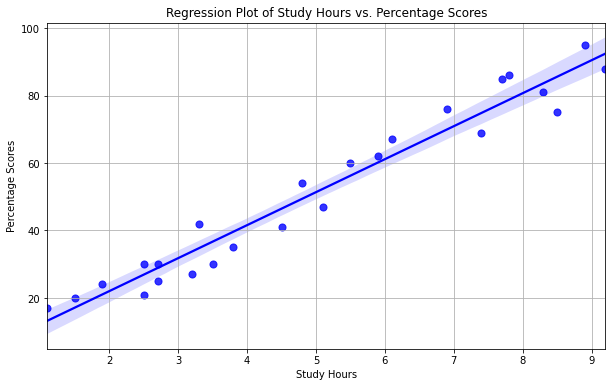

In [50]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Hours', y='Scores', data=data, color='b', scatter_kws={'s': 50})
plt.title('Regression Plot of Study Hours vs. Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage Scores')
plt.grid(True)
plt.show()


The regression plot shows a clear positive linear relationship between study hours and percentage scores. As study hours increase, the regression line indicates that percentage scores tend to increase as well.

# Now we have to Train the Model and Make Predictions.

### First Prepare the Data.

In [34]:
# Split the data into input (X) and output (y) variables
from sklearn.model_selection import train_test_split

X = data[['Hours']].values  # Study hours
y = data['Scores'].values   # Percentage scores

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The data was split into input (X) and output (y) variables, where "X" represents study hours, and "y" represents percentage scores.

A train-test split was performed, allocating 80% of the data for training and 20% for testing the model.

### Then Training the Model 

In [52]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
regressor = LinearRegression()

# Train the model on the training data
regressor.fit(X_train, y_train)

print("Training Successful.")

Training Successful.


A Linear Regression model was created and trained on the training data.

The model learned the relationship between study hours and percentage scores, aiming to predict scores based on hours of study.

# Now I will predict score if a student studies for 9.25 hrs/day?

In [53]:
new_study_hours = np.array([[9.25]])  
predicted_score = regressor.predict(new_study_hours)
print(f"Predicted score for 9.25 hours of study: {predicted_score[0]:.4f}")

Predicted score for 9.25 hours of study: 93.6917


The trained model was utilized to make predictions. Specifically, it predicted the percentage score for a hypothetical scenario where a student studies for 9.25 hours per day and it shows the predicted score is 93.69.

### Finally , Evaluate the Model

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error: 4.18
Mean Squared Error: 21.60
Root Mean Squared Error: 4.65
R-squared (R2) Score: 0.95


MAE (Mean Absolute Error): The model's average prediction error is around 4.18 percentage points, indicating relatively accurate predictions.

MSE (Mean Squared Error): On average, squared prediction errors are 21.60, with a preference for smaller errors. This suggests that most predictions are close to the actual values.

RMSE (Root Mean Squared Error): The model's predictions have an average error of approximately 4.65 percentage points, mirroring the target variable's units. Lower values are better.

R2 Score (Coefficient of Determination): The model explains about 95% of the variability in percentage scores based on study hours, signifying a strong predictive relationship.

# Conclusion

 This study illuminates the substantial impact of study hours on academic performance. The data-driven insights and regression analysis revealed the following key findings:

Study hours exhibit a strong positive correlation with percentage scores, making them a pivotal predictor of academic success.

The linear regression model, encapsulated by the equation "Percentage Score = 9.78 * Study Hours + 2.48," is highly effective in predicting student scores based on their study hours.

An exceptional R-squared value of approximately 0.95 underscores the model's ability to explain 95% of the variation in percentage scores.

This study has practical implications for both educators and students, offering valuable guidance on optimizing study strategies for improved academic outcomes. By recognizing the pivotal role of study habits, educational stakeholders can implement targeted interventions to enhance learning experiences and achievements.